Num of Rows:  148654
Num of Columns:  13
----------------
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
----------------
           Id  EmployeeName  JobTitle  BasePay  OvertimePay  OtherPay  \
0       False         False     False    False        False     False   
1       False         False     False    False        False     False   
2       False         False     False    False        False     False   
3       False         False     False    False        False     False   
4       False         False     False    False        False     False   
...       ...           ...       ...      ...          ...       ...   
148649  False         False     Fals

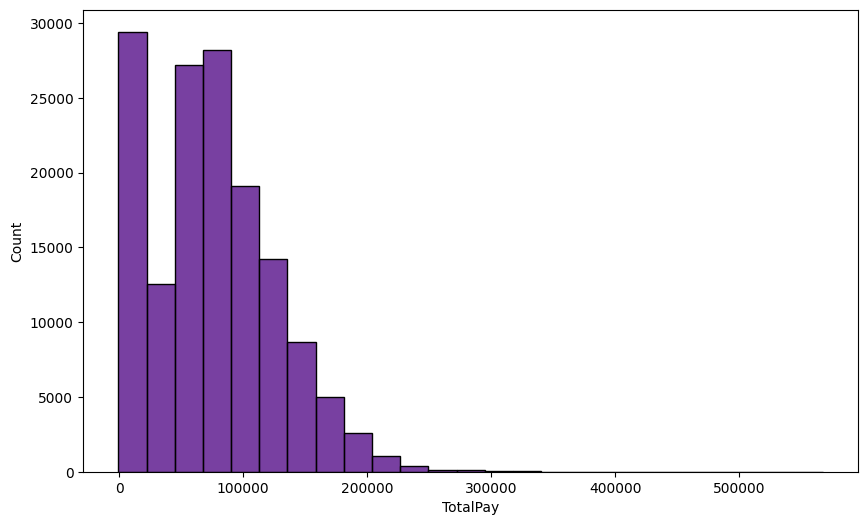

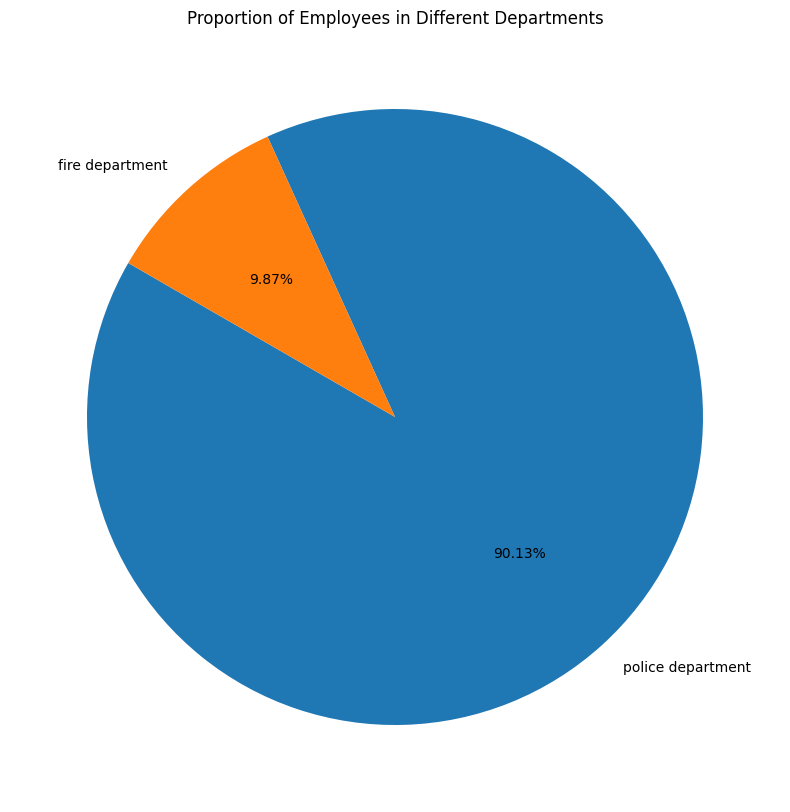

---------------------------------------------------
        count          mean           std     min         25%        50%  \
Year                                                                       
2011  36159.0  71744.103871  47498.706594    0.00  36810.7600  68213.240   
2012  36766.0  74113.262265  49523.904319    0.00  37560.6075  70714.680   
2013  37606.0  77611.443142  52854.774783    0.00  36754.9950  74500.015   
2014  38123.0  75463.918140  51697.713029 -618.13  33436.2100  72359.980   

             75%        max  
Year                         
2011  102512.680  567595.43  
2012  104099.170  362844.66  
2013  109637.670  347102.32  
2014  107974.445  471952.64  
---------------------------------------------------
The correlation between TotalPay &  TotalPayBenefits 0.9773128522072129


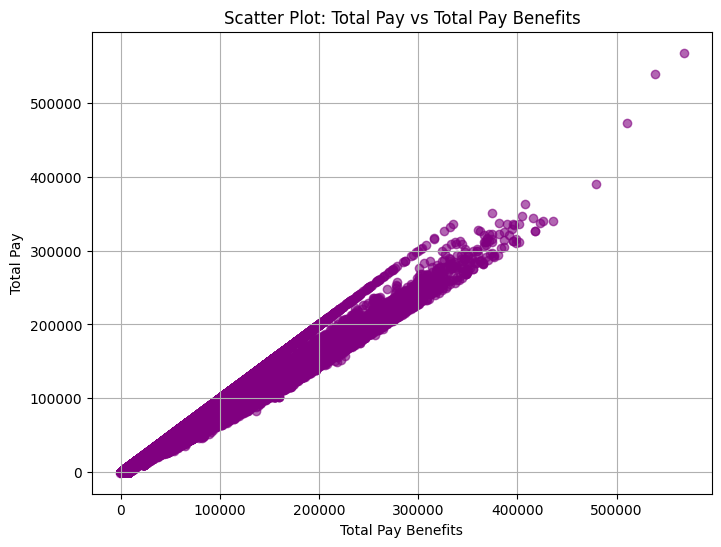

---------------------------------------------------


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#1) Basic Data Exploration
df = pd.read_csv('/kaggle/input/shaitask/Salaries.csv')
NumRows = len(df.axes[0])
NumCols = len(df.axes[1])
print("Num of Rows: ", NumRows)
print("Num of Columns: ", NumCols)
print("----------------")
ColTypes = df.dtypes 
print(ColTypes)
print("----------------")
print(df.isnull())
print(df.isnull().sum())
print("----------------")

#2) Descriptive Statistics
print(df['TotalPay'].describe())
Mode=df['TotalPay'].mode()
if not Mode.empty:
    print("Mode Salary:", Mode.iloc[0])
else:
    print("No unique mode has been found")
SalaryRange = df['TotalPay'].max() - df['TotalPay'].min()

print("Salary Range:", SalaryRange)
#print("                ")    
#print("OR:")
#print("----------------")
#Mean = df['TotalPay'].mean()
#Median = df['TotalPay'].median()
#Mode = df['TotalPay'].mode()
#Min = df['TotalPay'].min()
#Max = df['TotalPay'].max()
#Std=df['TotalPay'].std()
#if not mode.empty:
#    print("Mode Salary:", Mode.iloc[0])
#else:
#    print("No unique mode has been found")
#print("Mean Salary:",Mean)
#print("Median Salary:",Median)
#print("Minimum Salary:",Min)
#print("Maximum Salary:",Max)
#print("Standard Deviation:",Std)
print("---------------------------------------------------")

#3) Data Cleaning
print("Before cleaning the data:")
print(df.isnull().sum())
#BasePay,Benefits, Notes, Status, OvertimePay,OtherPay-->cols with missing value

#I notice that the basepay column contains missing values,so those have been 
#filled in with the mean of the base pay for that job title. As in the following code:
mean_salary= df.groupby('JobTitle')['BasePay'].transform('mean')
df['BasePay'].fillna(mean_salary, inplace=True)

#There are still 4 cells with missing values from OvertimePay, and OtherPay
#and we notice that these 4 rows do not include any value of pay, So the proper way 
#to handle it is to fill it with zero or remove the entire 4 rows.
df['OvertimePay'].fillna(0, inplace=True)
df['OtherPay'].fillna(0, inplace=True)
# and still have 8 missing values from BasePay 
# Given the data, the appropriate method is to fill the missing values with zero
df['BasePay'].fillna(0, inplace=True)


'''df['BasePay'].interpolate(method='linear',inplace=True)
df['OvertimePay'].interpolate(method='linear', inplace=True)
df['OtherPay'].interpolate(method='linear', inplace=True)'''

#For Benefits--> Replace missing values with 0.
#There is no benefit when the TotalPayBenefits and the Totalpay are equal on the same row.
#Consequently,I replace the missing value with zero,which is the appropriate approach in this case. 
df['Benefits'].fillna(0, inplace=True)


#For these columns: notes and status, it is preferable to delete them completely because there is
#no useful value.
df.drop('Status', axis=1, inplace=True)
df.drop('Notes', axis=1, inplace=True)
print("----------------")
print("After cleaning the data:")
print(df.isnull().sum())
print("---------------------------------------------------")


#4) Basic Data Visualization
# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(x='TotalPay',data=df, bins=25,color='indigo')
plt.show()
#The proportion of employees in the police department and
#the fire department is shown in this code.
df['JobTitle']=df['JobTitle'].str.lower()
term_to_check = 'department'
term_to_check2='dept'
sign_to_split="("
df['New_column'] = np.where(df['JobTitle'].str.contains(term_to_check, case=False)| df['JobTitle'].str.contains(term_to_check2, case=False), df['JobTitle'], 'Other')
df['New_column'] = df['New_column'].str.split(sign_to_split).str[1].str.rstrip(')')
df['New_column'] = df['New_column'].replace('fire dept', 'fire department')
department_counts = df['New_column'].value_counts()
#print(department_counts)
plt.figure(figsize=(10,10))
#Most of the space is occupied by the police department.
plt.pie(department_counts, labels=department_counts.index, autopct='%2.2f%%', startangle=150)
plt.title('Proportion of Employees in Different Departments')
plt.show()
print("---------------------------------------------------")

#5) Grouped Analysis
AveSalaryByYear = df.groupby('Year')['TotalPay'].describe()
print(AveSalaryByYear)
print("---------------------------------------------------")
#The average salary increased between 2011 and 2013, but in 2014 it decreased from the 
#previous year. The lowest average salaries were observed in 2011 and the highest in 2013.


#6) Simple Correlation Analysis
corr1 = df['TotalPay'].corr(df['TotalPayBenefits'])
print("The correlation between TotalPay &  TotalPayBenefits",corr1)
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalPayBenefits'], df['TotalPay'], alpha=.6,c="purple")
plt.title(f'Scatter Plot: Total Pay vs Total Pay Benefits')
plt.xlabel('Total Pay Benefits')
plt.ylabel('Total Pay')
plt.grid(True)
plt.show()
print("---------------------------------------------------")

#6) Summary of Insights

#1)It is preferable to separate the job title column into more than one column,
#such as a column for the job name and a column for the department. This
#also facilitates the process of conducting calculations on a specific
#part or column, such as departments.

#2) There is a  strong relationship between the two TotalPay and TotalPayBenefits columns 
#and between TotalPay and basepay columns.

#3)I have some notes on this data set: 
#A)There are 3 columns that are useless:Status,Notes,Agency.
#B)The agency column is unnecessary because it contains the
#same value (it can be considered that this data is for the San Francisco agency)
#C)There are many rows that contain zero values for these column('BasePay'
#'OvertimePay','OtherPay','TotalPay','TotalPayBenefits'), which is illogical
#and not useful if the goal is to display the numerical analyses.
#D)We also noticed that there are negative values for the wage columns,
#and this does not make sense.

#4)Changes in the economy, the industry, policies, etc.,
#may all have a significant impact on how salaries differ over time.